In [1]:
%pip install sklearn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Model Training

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
# modelling 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [22]:
df = pd.read_csv('data\StudentsPerformance.csv')

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
X = df.drop(columns = ['math score'], axis=1)
y = df['math score']

In [25]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [26]:
num_features = X.select_dtypes(exclude = ['object']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

#pipeline
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),     
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [28]:
X = preprocessor.fit_transform(X)

In [29]:
X.shape

(1000, 19)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
print(X_train.shape,X_test.shape)

(800, 19) (200, 19)


#### Create a function to give all metrics after model training

In [32]:
from sklearn.metrics import mean_absolute_error 
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_s = r2_score(true, predicted) 
    return mse, mae, r2_s, rmse

In [36]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForestClassifier": RandomForestRegressor(),
    "SVR": SVR(),
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # make predictions
    y_pred_train  = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    model_train_mse, model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_pred_train)
    model_test_mse, model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_pred_test)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for the training set")
    print(" Mean Squared Error: ", model_train_mse)
    print(" Mean Absolute Error", model_train_mae)
    print(" Root Mean Squared Error: ", model_train_rmse)
    print(" R2_score: ", model_train_r2)
    
    print("----------------------------------------------------")
    
    print("Model performance for the testing set")
    print(" Mean Squared Error: ", model_test_mse)
    print(" Mean Absolute Error", model_test_mae)
    print(" Root Mean Squared Error: ", model_test_rmse)
    print(" R2_score: ", model_test_r2)
    r2_list.append(model_test_r2)
    
    print("*" * 35)
    print('\n')

Linear Regression
Model performance for the training set
 Mean Squared Error:  28.5175634765625
 Mean Absolute Error 4.272265625
 Root Mean Squared Error:  0.8735068463594741
 R2_score:  5.340183842955456
----------------------------------------------------
Model performance for the testing set
 Mean Squared Error:  29.39126953125
 Mean Absolute Error 4.2253125
 Root Mean Squared Error:  0.8792164757750934
 R2_score:  5.421371554436202
***********************************


Lasso
Model performance for the training set
 Mean Squared Error:  43.47840400585579
 Mean Absolute Error 5.206302661246526
 Root Mean Squared Error:  0.8071462015863456
 R2_score:  6.593815587795566
----------------------------------------------------
Model performance for the testing set
 Mean Squared Error:  42.5064168384116
 Mean Absolute Error 5.157881810347763
 Root Mean Squared Error:  0.8253197323627853
 R2_score:  6.519694535667419
***********************************


Ridge
Model performance for the trainin

### Results

In [46]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model Name', 'R2_Score']).sort_values(by = ['R2_Score'], ascending=False)

,Model Name,R2_Score
6,SVR,8.126623
4,Decision Tree,7.928745
3,KNeighborsRegressor,7.258333
1,Lasso,6.519695
5,RandomForestClassifier,5.999973
0,Linear Regression,5.421372
2,Ridge,5.390387


In [45]:
svm_model = SVR(kernel= 'linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
score = r2_score(y_test, y_pred)
print("Accuracy of the model is ",score)

Accuracy of the model is  0.880778802958275


Text(0, 0.5, 'Predicted')

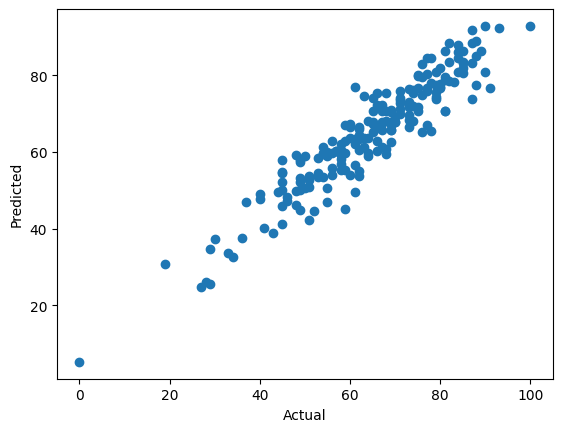

In [47]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

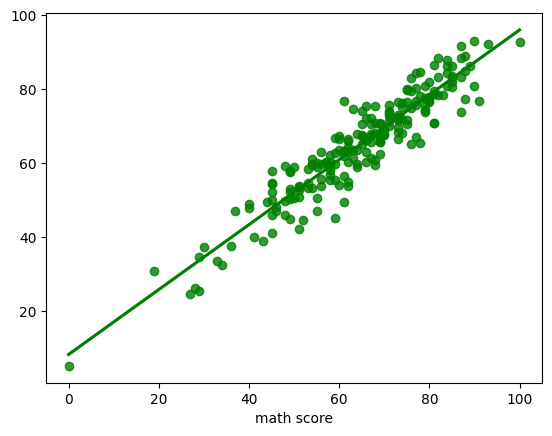

In [49]:
sns.regplot(x=y_test,y = y_pred, ci= None, color = 'green')

In [51]:
pred_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred,"Difference": y_test-y_pred})
pred_df

,Actual,Predicted,Difference
521,91,76.768664,14.231336
737,53,58.464491,-5.464491
740,80,76.670481,3.329519
660,74,76.200498,-2.200498
411,84,87.906242,-3.906242
...,...,...,...
408,52,44.598637,7.401363
332,62,63.371539,-1.371539
208,74,68.077911,5.922089
613,65,67.734978,-2.734978
